# Project 1: Abalone UCI dataset

Predict the age of abalone from physical measurements (number of rings)

### import data from url

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
s=requests.get(url).content
abalone_df=pd.read_csv(io.StringIO(s.decode('utf-8')))
print(abalone_df.head(5))

   M  0.455  0.365  0.095   0.514  0.2245   0.101   0.15  15
0  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
1  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
2  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
3  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
4  I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.120   8


In [3]:
abalone_df.columns = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings']

### Data exploration

In [4]:
abalone_df.head()
sns.set_style("darkgrid")

array([ 7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 15, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

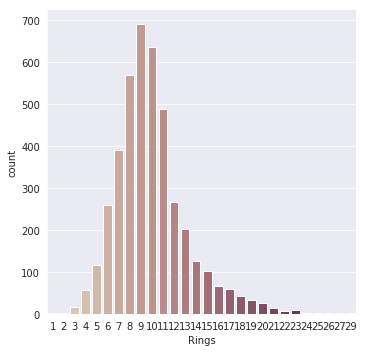

In [5]:
sns.catplot(x="Rings", kind="count", palette="ch:.25", data=abalone_df);
abalone_df.Rings.unique()
#between three and 23 rings, most are 7-12 rings old, nice normal distribution present
#not categorical, looks continuous

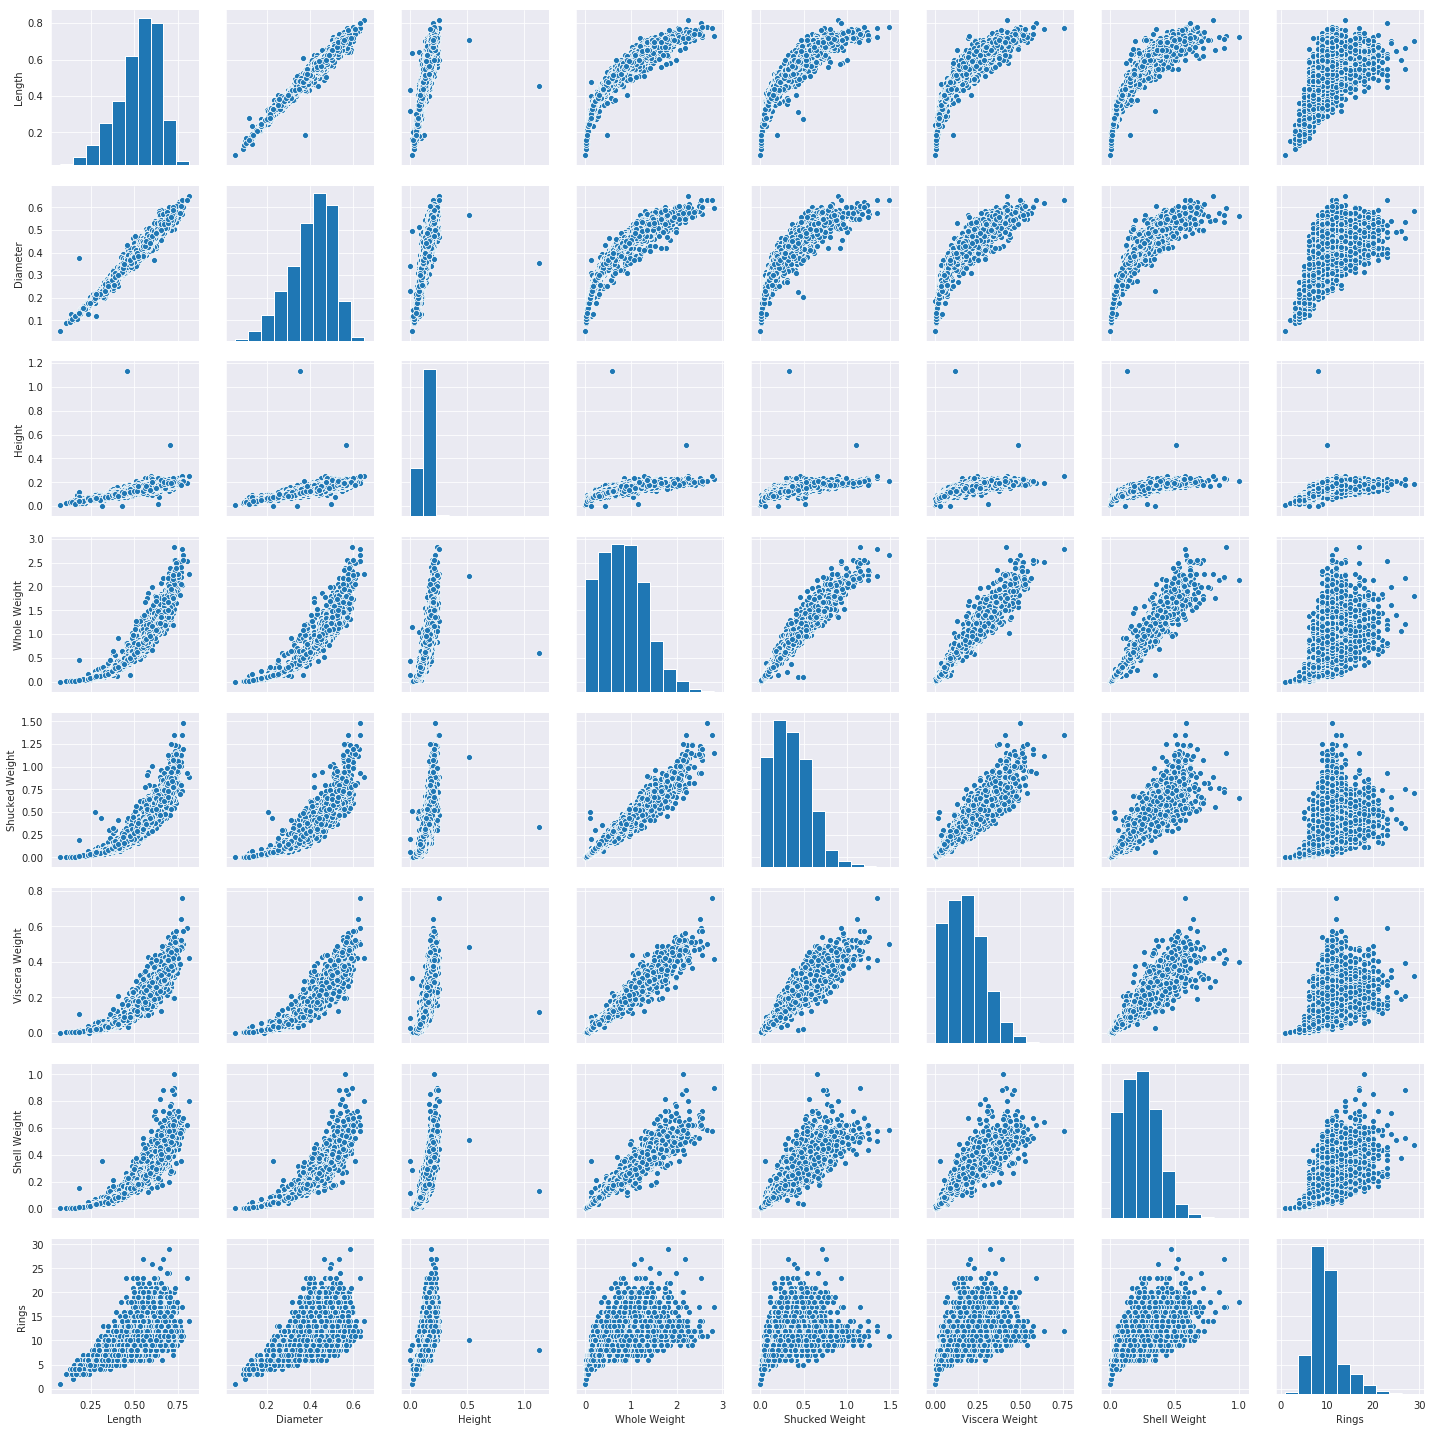

In [6]:
sns.pairplot(abalone_df)
#no clear relationships between rings and anything else. Length seems to have polynomial relationships with a few features

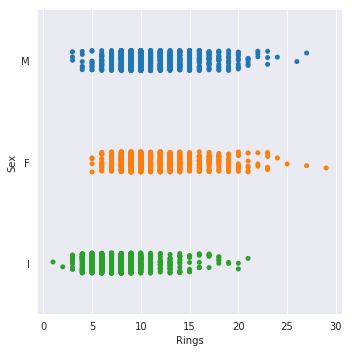

In [7]:
sns.catplot(x="Rings",y="Sex",data=abalone_df)
#what is I? what it looks like is that the sex is not determined at birth - and then they differentiate? Males diferentate earlier than females?
#no sex survives noticeably longer than the other - so that's not a factor on their age

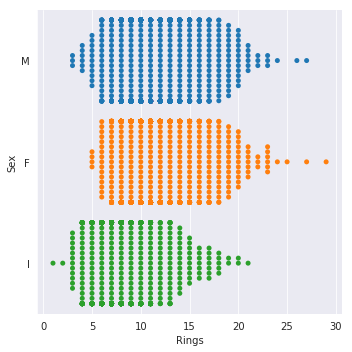

In [8]:
#playing around with plots
sns.catplot(x="Rings",y="Sex",kind="swarm",data=abalone_df)

In [9]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
Sex               4176 non-null object
Length            4176 non-null float64
Diameter          4176 non-null float64
Height            4176 non-null float64
Whole Weight      4176 non-null float64
Shucked Weight    4176 non-null float64
Viscera Weight    4176 non-null float64
Shell Weight      4176 non-null float64
Rings             4176 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.7+ KB


In [10]:
#check for duplicates
abalone_df.duplicated().value_counts()

False    4176
dtype: int64

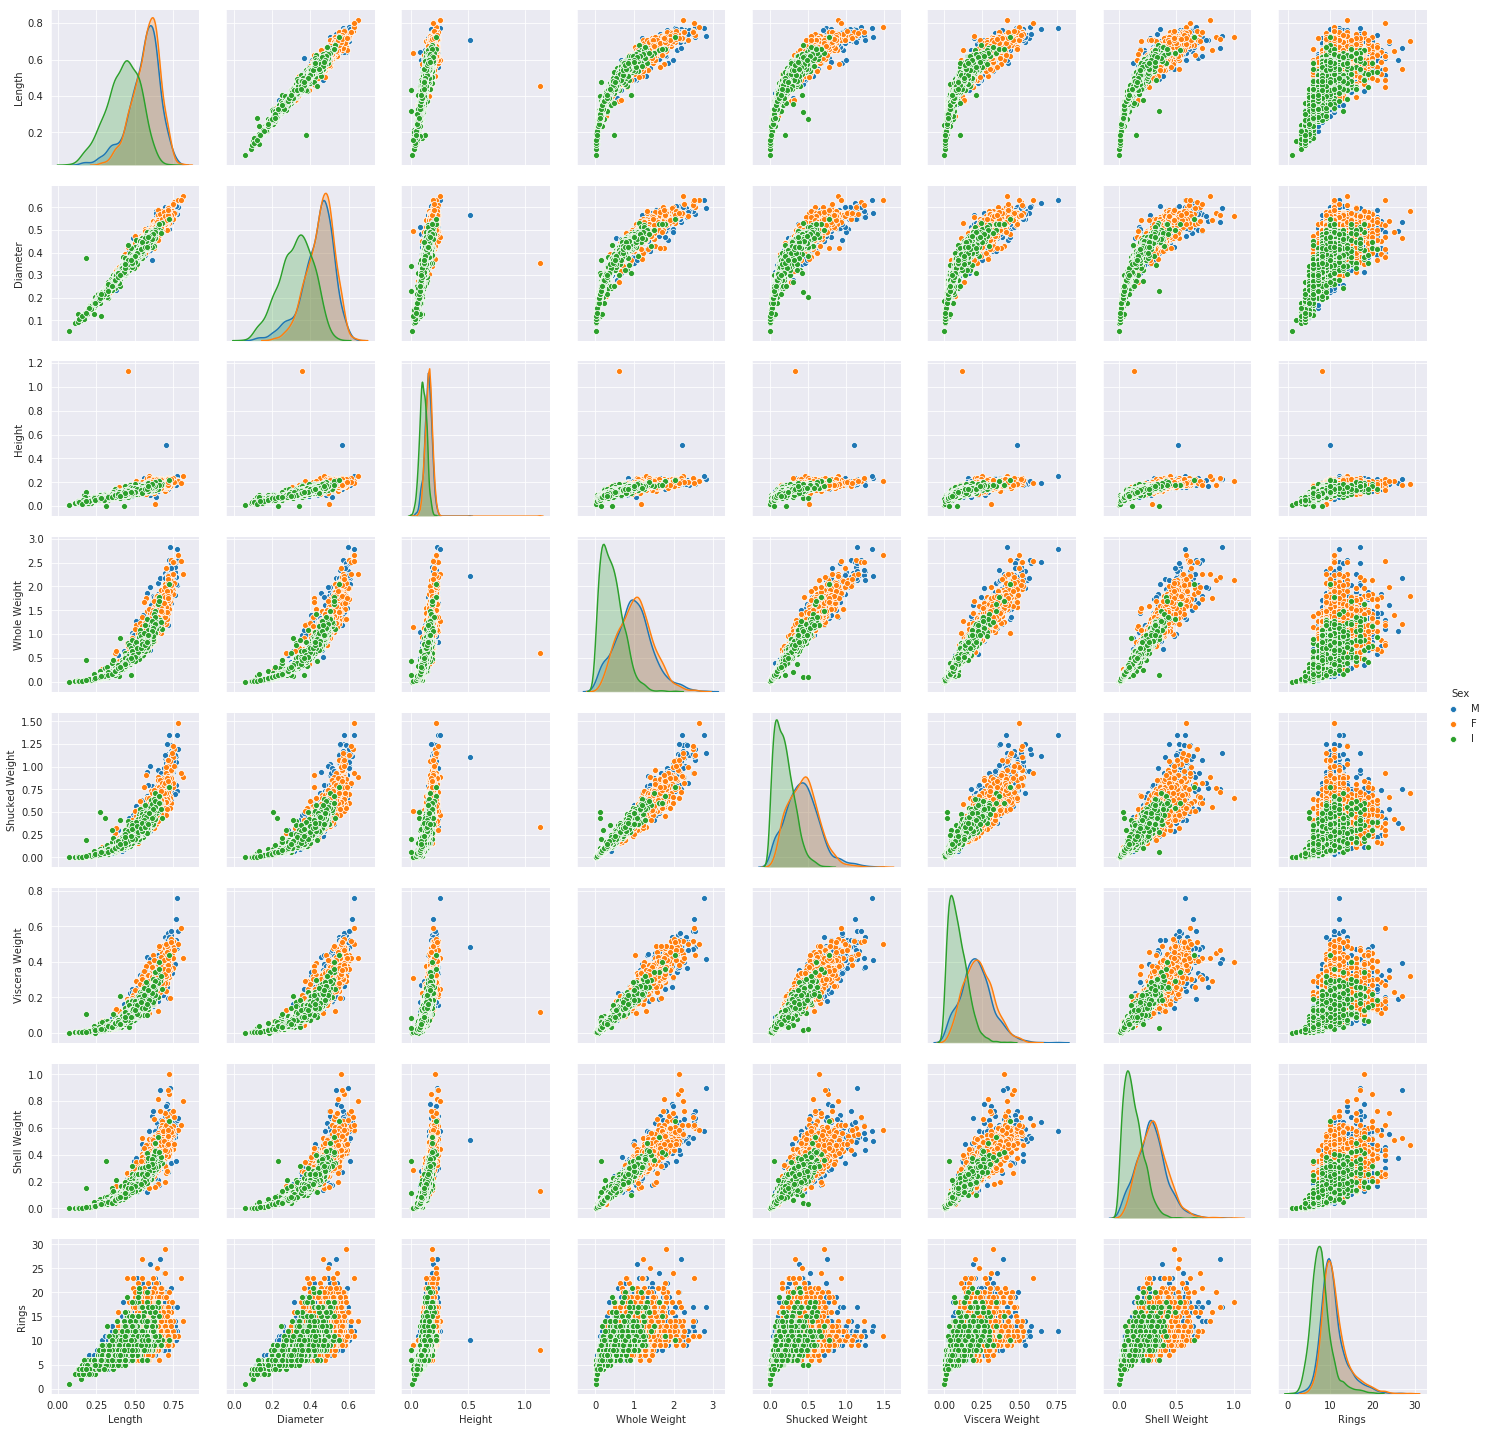

In [11]:
sns.pairplot(abalone_df,hue="Sex")
#! it does indeed seem as though the younger abalone are undifferentiated with respect to sex. very clear pattern - green, orange, blue.

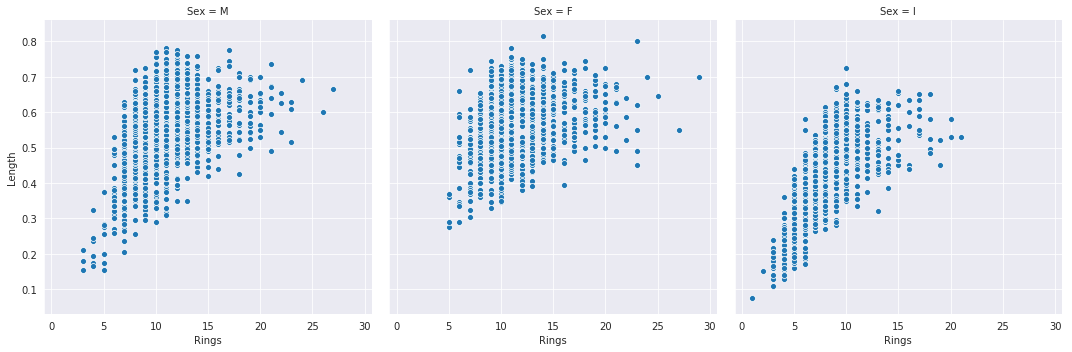

In [12]:
#lets look at length 
sns.relplot(x="Rings",y="Length",col="Sex",data=abalone_df)

In [13]:
abalone_df.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


### Linear Regression 

NB! we must test some assumptions before we dive in

generally, these are:
1. There is a linear relationship between dependent variable and independent variables
2. There are few outliers
3. No high-leverage points
4. Homoscedasticity of error terms
5. Uncorrelated error terms
6. Independent features (lack of collinearity)
7. multivariate normality?

https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Assumptions-and-Evaluation/

https://medium.com/@dhwajraj/learning-python-regression-analysis-part-8-data-transformation-1772a4db1927

In [14]:
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing

dummy_encoded_df=pd.get_dummies(abalone_df,prefix=['Sex'],drop_first=True)
# need to encode dummies

In [15]:
train_df, test_df = train_test_split(dummy_encoded_df, test_size=0.2)
print(train_df.head())

reg=linear_model.LinearRegression()
X=train_df.drop(columns='Rings')
reg.fit(X,train_df['Rings'])
print(reg.coef_)

      Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
4113   0.570      0.45   0.150        0.9645          0.5310          0.1890   
2296   0.475      0.36   0.120        0.5780          0.2825          0.1200   
420    0.490      0.38   0.120        0.5290          0.2165          0.1390   
2970   0.715      0.55   0.175        1.8250          0.9380          0.3805   
2118   0.455      0.37   0.125        0.4330          0.2010          0.1265   

      Shell Weight  Rings  Sex_I  Sex_M  
4113         0.209      9      0      0  
2296         0.170      8      0      1  
420          0.155     11      1      0  
2970         0.440     11      0      1  
2118         0.145      9      1      0  
[ -5.50482360e-01   1.09571453e+01   9.36753517e+00   9.75105239e+00
  -1.98225640e+01  -1.19709282e+01   7.24233707e+00  -8.60028121e-01
   1.06765782e-02]


In [16]:
#train results
from sklearn.metrics import mean_squared_error, r2_score

train_pred_rings = reg.predict(X)
print('Mean squared error: %.2f' % mean_squared_error(train_df['Rings'],train_pred_rings))
print('Variance score: %.2f' % r2_score(train_df['Rings'],train_pred_rings))
print('Average variance of rings: \n', train_df['Rings'].std())
#good resources: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

Mean squared error: 4.71
Variance score: 0.53
Average variance of rings: 
 3.16423634685


Looking above, it isn't even worth continuing with this model since if this is the train score we are getting, imagine the test score

In [17]:
#what if we try scaling  - shouldn't make too much difference 
#library actually scales internally

from sklearn import preprocessing

scaled_df = preprocessing.scale(dummy_encoded_df.iloc[:,0:-3])
print(scaled_df)




[[-1.44900723 -1.43989229 -1.18425209 ..., -1.17096695 -1.20532696
  -1.21305408]
 [ 0.0498915   0.12201495 -0.10824748 ..., -0.46361041 -0.35684354
  -0.20727719]
 [-0.69955786 -0.4322102  -0.34735962 ..., -0.64833409 -0.60773918
  -0.60240383]
 ..., 
 [ 0.63279657  0.67624011  1.56553747 ...,  0.74835715  0.97518418
   0.49676663]
 [ 0.84097695  0.77700832  0.25042072 ...,  0.77313716  0.73341202
   0.41055718]
 [ 1.54879024  1.48238578  1.32642533 ...,  2.64064851  1.78717368
   1.84019719]]


In [18]:
reg_scaled=linear_model.LinearRegression()
reg_scaled.fit(scaled_df,preprocessing.scale(abalone_df['Rings']))
print(reg_scaled.coef_)

[-0.05632789  0.40821146  0.15440777  1.40571766 -1.39159857 -0.33352796
  0.37083452]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [19]:
scaled_pred_rings = reg_scaled.predict(scaled_df)
print('Mean squared error: %.2f' % mean_squared_error(preprocessing.scale(abalone_df['Rings']),scaled_pred_rings))
print('Variance score: %.2f' % r2_score(preprocessing.scale(abalone_df['Rings']),scaled_pred_rings))
print('Average variance of rings: \n', preprocessing.scale(abalone_df['Rings']).std())


Mean squared error: 0.47
Variance score: 0.53
Average variance of rings: 
 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


### Performing poorly - test linearity assumption 

It is simple to check a residual plot and see that the errors are uncorrelated for one variable. What do we do for multiple linear regression? 

We can use standardised residual plot against each one of the predictor variables. We are looking for a random scatter plot and any pattern in the error indicates a violation of the linearity

In [34]:
residuals = train_pred_rings - train_df['Rings']
residuals

4113   -0.692505
2296    0.803966
420    -2.361448
2970   -1.728202
2118   -0.956553
3438    0.148139
821    -0.637017
1898    1.678817
840     1.268115
2119    1.865676
469     1.914101
2556    0.553707
2787    0.070928
1966    1.511370
2769   -0.855358
761    -2.905623
3933    0.981661
3959    1.292057
1757    3.063851
1021   -0.006304
2913    0.850934
730    -2.520182
1601    0.998826
3684    0.806136
2395   -2.705978
4154    2.268054
3102    2.634436
3075    4.804460
733    -5.499456
379    -1.223021
          ...   
3541    0.930204
464     0.123439
1113    0.148118
1302    0.676413
2947    2.792253
695     0.894540
2152    1.264994
4123    1.121786
3543   -0.727858
1972    1.061597
1967   -0.712796
1375    2.188836
1111    2.346784
2688    2.175652
908    -0.639564
1153   -0.893460
1236    1.279484
3601    2.055903
3317    1.874020
829     2.347374
389    -2.295105
919     1.343463
354    -3.537889
3713   -0.449059
1857   -0.576961
1728   -0.936181
4139    4.467170
3068    0.3486

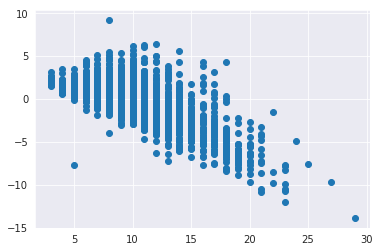

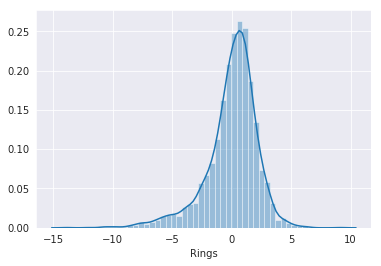

In [38]:
plt.scatter(train_df['Rings'],residuals)
plt.show()
sns.distplot(residuals) #note the residuals are not skewed so do not take any logs. 
#The residuals are not randomly scattered - there is nonlinearity ( not sloved by taking logs)
#https://stats.stackexchange.com/questions/298/in-linear-regression-when-is-it-appropriate-to-use-the-log-of-an-independent-va

idea: polynomial 
idea: discretize var and use classification
https://medium.com/@dhwajraj/learning-python-regression-analysis-part-8-data-transformation-1772a4db1927

In [31]:
#log log model

from sklearn.preprocessing import FunctionTransformer

X_log = train_df.drop(columns='Rings')
Y_log=train_df[['Rings']]

transformer = FunctionTransformer(np.log1p)

X_log = transformer.transform(X_log)
#Y_log = transformer.transform(Y_log)



reg_logged=linear_model.LinearRegression()
reg_logged.fit(X_log,Y_log)



#train results
from sklearn.metrics import mean_squared_error, r2_score

logged_pred_rings = reg.predict(X_log)
print('Mean squared error: %.2f' % mean_squared_error(train_df[['Rings']],logged_pred_rings))
print('Variance score (R2): %.2f' % r2_score(train_df[['Rings']],logged_pred_rings))
print('Average variance of rings: \n', Y_log.std())


Mean squared error: 10.38
Variance score (R2): -0.04
Average variance of rings: 
 Rings    3.164236
dtype: float64


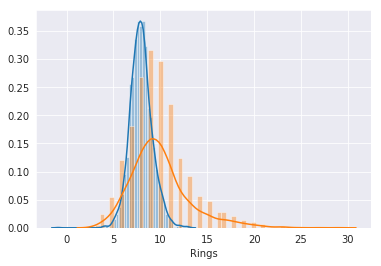

In [32]:
sns.distplot(logged_pred_rings)
sns.distplot(train_df['Rings'])

In [39]:
#http://rogerdudler.github.io/git-guide/

In [40]:
#try polynomial regression. Looks like it wouldn't be over complex looking at the residuals. Hard to tell beacuse multidimensional. Try order 2 

In [41]:
# Import
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [42]:
# PolynomialFeatures (prepreprocessing)
X = train_df.drop(columns='Rings')
y=train_df[['Rings']]


poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)


In [43]:
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_, y)

# Obtain coefficients
lg.coef_

#https://www.ritchieng.com/machine-learning-polynomial-regression/

array([[  5.51674953e-13,   1.94409230e+01,   2.98253660e+01,
         -9.43689556e+00,   5.97862625e+00,  -4.42856560e+01,
          1.45193367e+01,   3.05854515e+01,   4.49403789e+13,
         -4.26518399e+12,  -4.61777457e+01,   7.06318323e+01,
         -5.17636135e+01,  -5.43199287e+01,   9.96549739e+01,
         -4.64368956e+01,   7.28426113e+01,  -7.64686133e+00,
          4.15250862e+00,  -1.23173956e+02,   1.34590198e+02,
          9.38237998e+01,  -7.59598373e+01,  -1.18891956e+00,
         -1.25698068e+02,  -1.79059181e+00,  -5.20800602e+00,
          5.65116410e-01,   3.16917268e+01,  -8.22787471e+01,
         -4.02066517e+01,  -1.07633811e+01,   1.53825474e+01,
          5.35693359e+00,   3.44921875e+00,  -4.09824219e+01,
         -6.53710938e+00,   6.01757812e+00,   4.58984375e+00,
          1.47216797e+00,   4.85648193e+01,   3.45893555e+01,
          7.36914062e+00,   4.37500000e+00,  -1.77734375e-01,
          3.29394531e+01,  -3.88015137e+01,  -6.98339844e+00,
        

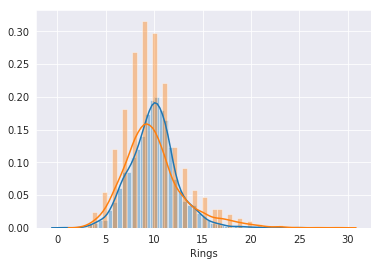

In [46]:
# Predict
poly_predicted=lg.predict(X_)

sns.distplot(poly_predicted)
sns.distplot(train_df['Rings'])

#looks much better

In [49]:
#train results
from sklearn.metrics import mean_squared_error, r2_score


print('Mean squared error: %.2f' % mean_squared_error(train_df[['Rings']],poly_predicted))
print('Variance score (R2): %.2f' % r2_score(train_df[['Rings']],poly_predicted))
print('Average variance of rings: \n', train_df[['Rings']].std())

#R squared is higher 

Mean squared error: 4.10
Variance score (R2): 0.59
Average variance of rings: 
 Rings    3.164236
dtype: float64


/home/scotty/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


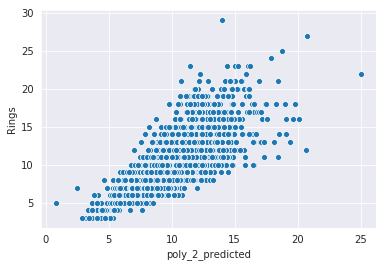

In [50]:
#plot what model fit looks like
train_df['poly_2_predicted']=poly_predicted

sns.scatterplot(x="poly_2_predicted", y="Rings", data=train_df)

#https://stats.stackexchange.com/questions/104622/what-does-an-actual-vs-fitted-graph-tell-us

#goodness of fit is weak. lets move away from regression